# TP SGD

In [1]:
### Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model

In [3]:
def perte_quadratique(a,b):
    return (a-b)**2/2

def derivee_loss(a,b):
    return a-b

def grad_desc(X, y, beta, lr=.01, converge_change=.001): 
    ''' 
    gradient descent function 
    '''
    cost = cost_func(beta, X, y) 
    change_cost = 1
    num_iter = 1
      
    while(change_cost > converge_change): 
        old_cost = cost 
        beta = beta - (lr * log_gradient(beta, X, y)) 
        cost = cost_func(beta, X, y) 
        change_cost = old_cost - cost 
        num_iter += 1
      
    return beta, num_iter

In [35]:
def stochastic_gradient(X, y, gamma, n_iter, w_ini, loss="mse",
                        alpha=0, average=False):
    n_samples = X.shape[0]
    X = np.concatenate((np.ones((n_samples, 1)), X), axis=1)
    all_w = np.zeros((n_iter, w_ini.size))
    all_w[0] = w_ini
    w = w_ini.copy()
    
    w_avg = w_ini.copy()
    
    pobj = np.zeros(n_iter)
    pobj_avg = np.zeros(n_iter)

    if not callable(gamma):
        # Turn gamma to a function for QUESTION ???

        def gamma_func(t):
            return gamma
    else:
        gamma_func = gamma

    for t in range(n_iter):
        idx = np.random.randint(n_samples)
        if loss == "mse":
            pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2)
            gradient = 0.0; # QUESTION 2
            
            pobj_avg[t] = 0.5 * np.mean((y - np.dot(X, w_avg)) ** 2)
            if alpha > 0:
                pobj[t] += 0.5 * np.dot(w, w)
                pobj_avg[t] += 0.5 * np.dot(w_avg, w_avg)
            gradient = X[idx, :] * (np.dot(X[idx], w) - y[idx])
            
            
        elif loss == "hinge":
            gradient = 0.0; # QUESTION 11
            raise NotImplementedError('QUESTION 11')
        w -= gamma_func(t) * gradient
        
        if average is True:
            raise NotImplementedError('QUESTION 9')

        if alpha > 0:
            raise NotImplementedError('QUESTION 6')
        
        
        all_w[t] = w
    return w, w_avg, all_w, pobj, pobj_avg

In [36]:
def decision_function(X, w):
    """ fonction de prediction a partir d'un vecteur directeur"""
    return np.dot(X, w[1:]) + w[0]


def predict(X, w):
    """ fonction de prediction de classe a partir d'un vecteur directeur"""
    return np.sign(decision_function(X, w))

In [54]:
n_samples = 1000
n_features = 100
#n_iter = 1000  # number of iterations
#gamma = 0.1  # suggested step size
gamma = 0.01  # step size
n_iter = 10000  # number of iterations

def gamma(t):
    return 1. / (100 + t)

X_toy = np.random.randn(n_samples, n_features)
epsilon_toy = np.random.randn(n_samples)
w_target = np.ones(n_features)
y_toy = X_toy.dot(w_target) + epsilon_toy


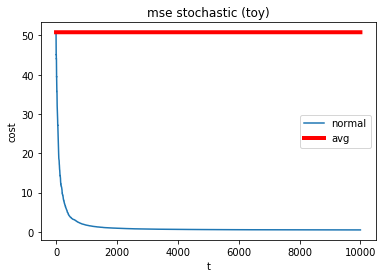

In [55]:
loss = 'mse'

# Initialize w with just zeros
w_ini = np.zeros(X_toy.shape[1] + 1)

w, w_avg, all_w, pobj, pobj_avg = stochastic_gradient(X_toy, y_toy, gamma,n_iter, w_ini, loss=loss, alpha=0)
plt.figure()
plt.plot(pobj, label="normal")
plt.plot(pobj_avg, 'r', label="avg", linewidth="4")
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic (toy)' % loss)
plt.legend(loc = 'best')
plt.show()

In [56]:
iris = datasets.load_iris()
X_iris = iris.data # we only take the first two features.
y_iris = iris.target

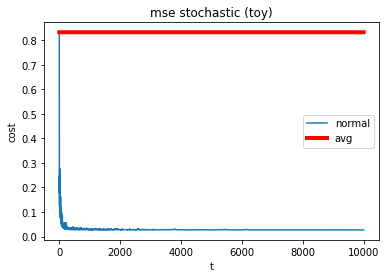

In [57]:
w_ini = np.zeros(X_iris.shape[1] + 1)
w, w_avg, all_w, pobj, pobj_avg = stochastic_gradient(X_iris, y_iris, gamma,n_iter, w_ini, loss=loss, alpha=0)
plt.figure()
plt.plot(pobj, label="normal")
plt.plot(pobj_avg, 'r', label="avg", linewidth="4")
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic (toy)' % loss)
plt.legend(loc = 'best')
plt.show()

In [ ]:
# quand on a un pas constant, la fonction ne converge pas, quand gamma est petit -> ca tend vers 0, quand gamma = 0.01 
# petite valeur propre, données normales, 